## RNN
시계열 데이터를 다루기 위한 모형

일정한 시간 간격으로 특정한 규칙성이나 패턴이 있는 경우

In [11]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [12]:
from nltk.corpus import movie_reviews

분석의 첫 단계로 NLTK 데이터를 불러와
아래와 같이 리뷰는 reviews에, 긍정 부정에 대한 라벨은 categories에 저장한다.

In [16]:
fileids = movie_reviews.fileids() # 영화 리뷰 데이터에서 파일 id를 가져옴
fileids[:5]

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt']

In [19]:
# 파일 id를 이용해 raw 텍스트 파일을 가져옴
reviews = [movie_reviews.raw(fileid) for fileid in fileids]
reviews[0]

'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience membe

In [20]:
# 파일 id를 이용해 라벨로 사용할 카테고리, 즉 긍정/부정 정보를 순서대로 가져옴
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids]
categories[:5]

['neg', 'neg', 'neg', 'neg', 'neg']

In [21]:
print('Reviews count:', len(reviews))
print('Length of the first review:', len(reviews[0]))
print("Labels:", set(categories))

Reviews count: 2000
Length of the first review: 4043
Labels: {'pos', 'neg'}


In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
np.random.seed(7)
tf.random.set_seed(7)

max_words = 1000 # 사용한 단어 수

# 빈도가 높은 1000개의 단어를 선택하도록 객체 생성
tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(reviews) # 단어 인덱스 구축

# 만들어진 단어 인덱스를 이용해 문서들을 변환
X = tokenizer.texts_to_sequences(reviews)
X[0]

[97,
 76,
 948,
 130,
 5,
 2,
 788,
 3,
 102,
 36,
 72,
 55,
 24,
 23,
 4,
 1,
 518,
 16,
 13,
 677,
 5,
 83,
 54,
 7,
 33,
 89,
 3,
 32,
 603,
 1,
 637,
 241,
 1,
 26,
 3,
 189,
 40,
 2,
 301,
 26,
 12,
 1,
 948,
 8,
 19,
 2,
 79,
 690,
 361,
 16,
 9,
 7,
 2,
 79,
 105,
 45,
 6,
 48,
 142,
 14,
 465,
 24,
 56,
 23,
 5,
 194,
 18,
 95,
 45,
 526,
 5,
 830,
 1,
 902,
 11,
 169,
 362,
 3,
 117,
 341,
 16,
 52,
 20,
 61,
 3,
 105,
 752,
 4,
 242,
 35,
 4,
 95,
 3,
 112,
 50,
 248,
 14,
 23,
 36,
 249,
 5,
 31,
 624,
 14,
 271,
 16,
 9,
 39,
 48,
 20,
 1,
 469,
 11,
 1,
 26,
 77,
 64,
 348,
 353,
 6,
 8,
 37,
 321,
 88,
 9,
 436,
 87,
 16,
 102,
 55,
 14,
 145,
 7,
 45,
 34,
 10,
 24,
 161,
 31,
 59,
 361,
 603,
 159,
 19,
 52,
 20,
 52,
 20,
 81,
 504,
 135,
 28,
 1,
 328,
 52,
 20,
 485,
 27,
 177,
 38,
 1,
 328,
 52,
 20,
 769,
 52,
 20,
 52,
 20,
 2,
 4,
 910,
 114,
 52,
 20,
 4,
 171,
 8,
 632,
 3,
 63,
 4,
 9,
 6,
 321,
 25,
 143,
 18,
 120,
 301,
 254,
 5,
 2,
 15,
 150,
 143,
 3,
 

In [27]:
print('Lengths of first 10 documents:', [len(doc) for doc in X[:10]])

Lengths of first 10 documents: [582, 182, 381, 308, 520, 494, 384, 401, 409, 596]


### 결과
모든 단어들을 원핫 인코딩으로 벡터 형태로 치환 -> 벡터의 크기는 내가 가진 사전에 등록된 단어의 수이다.

각 단어들이 숫자 형태로 바뀌어 있는 것을 확인할 수 있다.

In [28]:
# 사전 단어에 대한 인덱스를 확인하는 법
tokenizer.word_index["the"]

1

In [31]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 500 # 문서의 단어 수를 제한

# 문서의 단어 수가 500보다 작으면 0을 채우고, 크면 잘라냄
# 잘라낼 때, 앞을 자를 지, 뒤를 자를 지 선택할 수 있음.
# 앞을 자르고 뒷부분을 쓰고자 하면 'pre' 선택
X = pad_sequences(X, maxlen=maxlen, truncating='pre')

In [38]:
import numpy as np

# label을 0, 1의 값으로 변환

label_dict={'pos':1, 'neg':0}
y = np.array([label_dict[c] for c in categories])
y[:5]

array([0, 0, 0, 0, 0])

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print('Train set count:', len(X_train))
print('Test set count:', len(X_test))
print('Test samples:', y_test[:20])

Train set count: 1600
Test set count: 400
Test samples: [0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1]


## 일반적인 신경망 모형을 이용한 분류

RNN의 효과와 비교하기 위해 로지스틱 회귀 모형을 구현, 시퀀스 정보 없이 예측 수행

현재의 문서는 500개의 단어로 이루어져 있고 사전의 크기는 10,000이다.

따라서 원핫 인코딩시 벡터의 크기는 10000이 되고 이를 임베딩을 통해 32로 압축 시킨다.

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

# 순차적 모형
model = Sequential([
    Embedding(max_words, 32, input_length=maxlen),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           32000     
                                                                 
 flatten_1 (Flatten)         (None, 16000)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 16001     
                                                                 
Total params: 48,001
Trainable params: 48,001
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs = 10,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/10
40/40 [==============================] - 1s 5ms/step - loss: 0.6910 - acc: 0.5234 - val_loss: 0.6943 - val_acc: 0.5219
Epoch 2/10
40/40 [==============================] - 0s 2ms/step - loss: 0.6183 - acc: 0.7461 - val_loss: 0.6755 - val_acc: 0.5531
Epoch 3/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5238 - acc: 0.8891 - val_loss: 0.6421 - val_acc: 0.6594
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.4074 - acc: 0.9656 - val_loss: 0.6078 - val_acc: 0.6906
Epoch 5/10
40/40 [==============================] - 0s 2ms/step - loss: 0.2958 - acc: 0.9836 - val_loss: 0.5802 - val_acc: 0.7031
Epoch 6/10
40/40 [==============================] - 0s 2ms/step - loss: 0.2048 - acc: 0.9922 - val_loss: 0.5715 - val_acc: 0.7094
Epoch 7/10
40/40 [==============================] - 0s 2ms/step - loss: 0.1362 - acc: 0.9953 - val_loss: 0.5567 - val_acc: 0.7312
Epoch 8/10
40/40 [==============================] - 0s 2ms/step - loss: 0.0849 - acc: 0.99

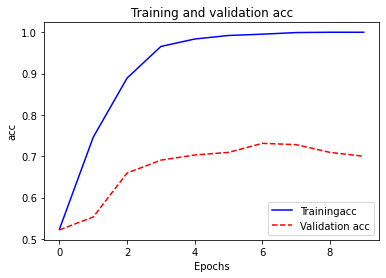

In [44]:
import matplotlib.pyplot as plt

def plot_results(history, metric):
    plt.plot(history.history[metric], 'b', label="Training" + metric)
    plt.plot(history.history['val_'+metric], 'r--',  label='Validation ' + metric)
    plt.title('Training and validation '+metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

plot_results(history, 'acc')

In [45]:
score = model.evaluate(X_test, y_test)
print(f'#Test accuracy:{score[1]:.3f}')

13/13 [==============================] - 0s 2ms/step - loss: 0.5791 - acc: 0.7175
#Test accuracy:0.717


### 결과

단어의 수 제한, 검증 데이터셋 분리, 단어 순서 데이터의 손실과 같은 이유로 성능이 저하 되었다.

## RNN 기반 문서분류

RNN을 이용할 땐 단어의 순서 정보를 활용할 수 있다.

Flatten() 대신에 SimpleRNN() 레이어를 사용한다. 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          32000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 35,169
Trainable params: 35,169
Non-trainable params: 0
_________________________________________________________________


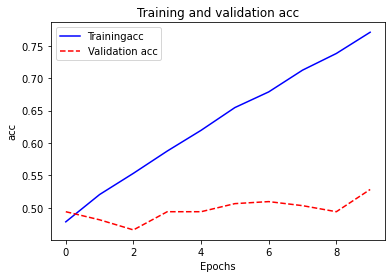

13/13 [==============================] - 0s 14ms/step - loss: 0.6945 - acc: 0.5275
#Test accuracy:0.527


In [46]:
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Embedding(max_words, 32),

    SimpleRNN(32),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

adam = Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=0,
                    validation_split=0.2)
plot_results(history, 'acc')

score = model.evaluate(X_test, y_test)
print(f'#Test accuracy:{score[1]:.3f}')

### 결과

acc값이 0.527로 거의 분류가 안되고 있다.

기울기 소실 문제 발생 -> 앞부분의 정보가 뒤로 갈수록 소실된다.

단어를 예측할 때 앞의 몇개의 문장 혹은 하나의 문장만으로도 학습이 가능하다.

하지만 많은 경우에 더 많은 문맥을 필요로 한다. 이는 RNN의 성능 저하를 불러 일으킨다.

## LSTM

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 64)          64000     
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 138,369
Trainable params: 138,369
Non-trainable params: 0
_________________________________________________________________


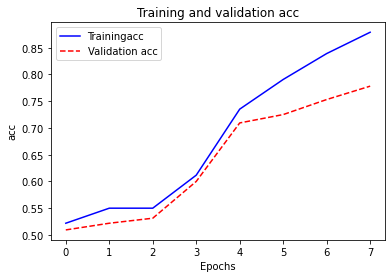

13/13 [==============================] - 1s 46ms/step - loss: 0.5718 - acc: 0.7575
#Test accuracy:0.757


In [48]:
from tensorflow.keras.layers import LSTM, Bidirectional

model = Sequential([
    Embedding(max_words, 64),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=8,
                    verbose=0,
                    validation_split=0.2)
plot_results(history, 'acc')

score = model.evaluate(X_test, y_test)
print(f'#Test accuracy:{score[1]:.3f}')